In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### CONSTANTS

In [2]:
ROW = 0
COLUMN = 1

### Read data

In [3]:
dfs = []
for number in range(30):
    start_row = number * 10**5
    end_row = (number + 1) * 10 ** 5    
    df = pd.read_csv("~/Downloads/used_cars_data.csv",
                          skiprows=range(1, start_row + 1), nrows=(end_row - start_row), low_memory = False)
    dfs.append(df)
df = pd.concat(dfs, axis=ROW)

In [4]:
df.shape

(3000000, 66)

### Check Massive Null

In [8]:
null_check_series = (df.isnull().mean() * 100)
null_columns = list(null_check_series[null_check_series > 10].index)

In [9]:
df = df.drop(null_columns, inplace=False, axis = COLUMN)

### Check duplicate columns / rows

In [10]:
def get_similarColPairs(df):
    answers = []
    
    columns = df.columns
    for col1_i in range(0, len(columns)):
        col1 = columns[col1_i]
        for col2_i in range(col1_i + 1, len(columns)):
            col2 = columns[col2_i]
            if df[col1].equals(df[col2]): answers.append([col1, col2])
    
    return answers

similarColPairs = get_similarColPairs(df)
for similarColPair in similarColPairs:
    df = df.drop([similarColPair[0]], inplace=False, axis=COLUMN)

df[df.duplicated()]

,vin,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_displacement,engine_type,exterior_color,...,sp_name,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
20,3FA6P0H79GR344482,38.3 in,Sedan,Washington Court House,6,43160,NaN,2000.0,I4,White,...,Beford Ford,A,Automatic,t57569,SE,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016
21,3TMCZ5AN4KM203273,32.6 in,Pickup Truck,Groveport,6,43125,"Click the Express button, Free home delivery o...",3500.0,V6,Super White,...,Ricart Used Car Factory,A,6-Speed Automatic,t80343,SR V6 Double Cab 4WD,4WD,Four-Wheel Drive,127.4 in,74.4 in,2019
22,1FTEW1EP0HKC03244,43.6 in,Pickup Truck,Groveport,65,43125,"Click the Express button, Free home delivery o...",3500.0,V6,Race Red,...,Ricart Used Car Factory,A,6-Speed Automatic,t69641,XLT SuperCrew 4WD,4WD,Four-Wheel Drive,145 in,96.8 in,2017
23,3FADP4EJ0KM129514,31.2 in,Hatchback,Washington Court House,253,43160,[!@@Additional Info@@!]Backup CameraRear View ...,1600.0,I4,Magnetic,...,Beford Ford,A,Automatic,t82591,SE Hatchback FWD,FWD,Front-Wheel Drive,98 in,77.8 in,2019
24,1N6AD0EV6KN713209,33.6 in,Pickup Truck,Heath,32,43056,CARFAX One-Owner. Clean CARFAX. Certified. Gun...,4000.0,V6,Gun Metallic,...,Coughlin Nissan,A,5-Speed Automatic,t83539,PRO-4X Crew Cab 4WD,4WD,Four-Wheel Drive,125.9 in,72.8 in,2019
25,5N1AZ2MS4KN121455,38.7 in,SUV / Crossover,Heath,29,43056,CARFAX One-Owner. Certified. Gun Metallic 2019...,3500.0,V6,Gun Metallic,...,Coughlin Nissan,CVT,Continuously Variable Transmission,t84555,SV AWD,AWD,All-Wheel Drive,111.2 in,75.4 in,2019
26,1G1ZE5SX2LF145812,38.1 in,Sedan,Wilmington,34,45177,Please consider inquiring about our vehicle pi...,2000.0,I4,Mosaic Black Metallic,...,Bush Auto Place,A,9-Speed Automatic,t85492,Premier FWD,FWD,Front-Wheel Drive,111.4 in,73 in,2020
27,2HKRW2H52LH679102,40.4 in,SUV / Crossover,Westerville,2,43081,Roush Honfidence is our way of expressing conf...,1500.0,I4,Modern Steel Metallic,...,Roush Budget Car Outlet,CVT,Continuously Variable Transmission,t89597,EX AWD,AWD,All-Wheel Drive,104.7 in,73 in,2020
28,1FMSK8DH8LGC57819,39 in,SUV / Crossover,Columbus,71,43229,Agate Black Metallic 2020 Ford Explorer XLT 4W...,2300.0,I4,Agate Black Metallic,...,Krieger Ford Inc.,A,Automatic,t84879,XLT AWD,AWD,All-Wheel Drive,119.1 in,89.3 in,2020
29,1N4BL4DV0LC262865,35.2 in,Sedan,Columbus,46,43230,"Price excludes tax, tags, title, licensing, de...",2500.0,I4,Storm Blue Metallic,...,Germain Nissan of Columbus,CVT,Continuously Variable Transmission,t87018,2.5 SV FWD,FWD,Front-Wheel Drive,111.2 in,72.9 in,2020


In [11]:
df.shape

(3000000, 42)

### Check categorical / datetime columns

In [12]:
df.dtypes.value_counts()

object     28
float64     8
int64       4
bool        2
Name: count, dtype: int64

In [13]:
categorical_columns = (df.dtypes == "object")
categorical_columns = np.array(categorical_columns[categorical_columns].index)
len(categorical_columns)

28

In [14]:
def print_columns(df, categorical_columns):
    for column in categorical_columns:
        print(df[column].head())
        print()    

In [15]:
unrelated_columns = ["vin", "description", "exterior_color", "major_options", "dealer_zip",
                     "sp_name", "trimId", "transmission_display", "trim_name", 'listing_id', 'sp_id']
convert_able_columns = np.setdiff1d(categorical_columns, unrelated_columns)

In [16]:
df = df.drop(unrelated_columns, inplace=False, axis=COLUMN)

In [17]:
def get_numerically_extracted_columns(df, cols):

    def extract_numeric(col):
        return col.str.extract(r'(\d+\.\d+|\d+)').astype(float)
    
    for column in extract_able_columns:
        df[column] = extract_numeric(df[column])
    
    return df   

In [18]:
extract_able_columns = ["back_legroom", "front_legroom", "fuel_tank_volume",
                        "height", "length", "maximum_seating", "wheelbase", "width"]
required_encoding_columns = np.setdiff1d(convert_able_columns, extract_able_columns)
if "is_new" not in required_encoding_columns: np.append(required_encoding_columns, "is_new")
if "franchise_dealer" not in required_encoding_columns: np.append(required_encoding_columns, "franchise_dealer")

In [19]:
df = get_numerically_extracted_columns(df, extract_able_columns)

### Check small missing data

back_legroom: mean / median

engine_displacement: mean / median

horsepower: mean / median

In [20]:
def get_percentage_null(df):
    return (df.isnull().mean() * 100).sort_values(ascending = False)

In [21]:
get_percentage_null(df)

back_legroom            8.090833
front_legroom           5.848533
engine_displacement     5.746167
horsepower              5.746167
fuel_tank_volume        5.355867
maximum_seating         5.325633
width                   5.324967
height                  5.324533
length                  5.324167
wheelbase               5.323367
wheel_system_display    4.891033
wheel_system            4.891033
mileage                 4.812867
engine_type             3.352667
fuel_type               2.757433
transmission            2.139400
seller_rating           1.362400
body_type               0.451433
model_name              0.000000
savings_amount          0.000000
price                   0.000000
listed_date             0.000000
make_name               0.000000
longitude               0.000000
listing_color           0.000000
latitude                0.000000
is_new                  0.000000
franchise_dealer        0.000000
daysonmarket            0.000000
city                    0.000000
year      

In [22]:
has_null_columns = dict(get_percentage_null(df)).keys()

In [23]:
for has_null_column in has_null_columns:
    print(df[has_null_column].head())
    print()

0    35.1
1    38.1
2    35.4
3    37.6
4    38.1
Name: back_legroom, dtype: float64

0    41.2
1    39.1
2    43.3
3    39.0
4    39.1
Name: front_legroom, dtype: float64

0    1300.0
1    2000.0
2    2500.0
3    3000.0
4    2000.0
Name: engine_displacement, dtype: float64

0    177.0
1    246.0
2    305.0
3    340.0
4    246.0
Name: horsepower, dtype: float64

0    12.7
1    17.7
2    15.9
3    23.5
4    17.7
Name: fuel_tank_volume, dtype: float64

0    5.0
1    7.0
2    5.0
3    7.0
4    7.0
Name: maximum_seating, dtype: float64

0    79.6
1    85.6
2    78.9
3    87.4
4    85.6
Name: width, dtype: float64

0    66.5
1    68.0
2    58.1
3    73.0
4    68.0
Name: height, dtype: float64

0    166.6
1    181.0
2    180.9
3    195.1
4    181.0
Name: length, dtype: float64

0    101.2
1    107.9
2    104.3
3    115.0
4    107.9
Name: wheelbase, dtype: float64

0    Front-Wheel Drive
1      All-Wheel Drive
2      All-Wheel Drive
3      All-Wheel Drive
4      All-Wheel Drive
Name: wheel_sy

In [24]:
not_imputable_columns = ["wheel_system", "wheel_system_display", "fuel_type",
                         "transmission", "body_type", "model_name", "listing_color",
                         "make_name", "is_new", "franchise_dealer", "city", "engine_type"]
df = df.dropna(subset = not_imputable_columns)

In [25]:
def distribution_plot(columns):
    # Plot distribution for each column with null values using pyplot
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

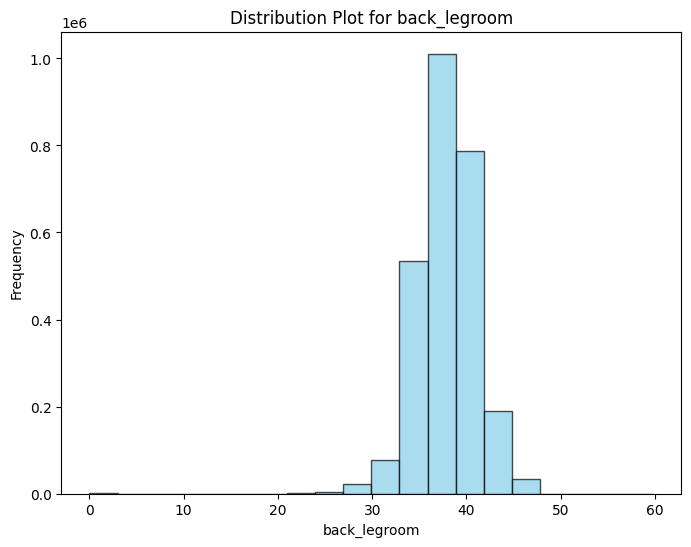

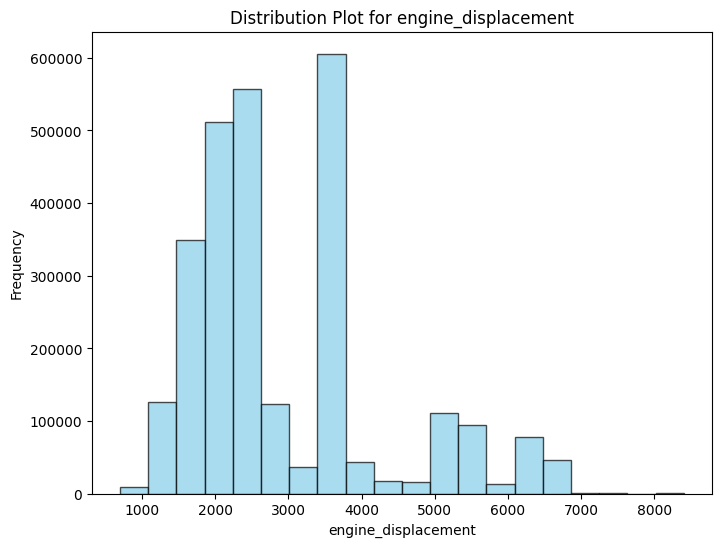

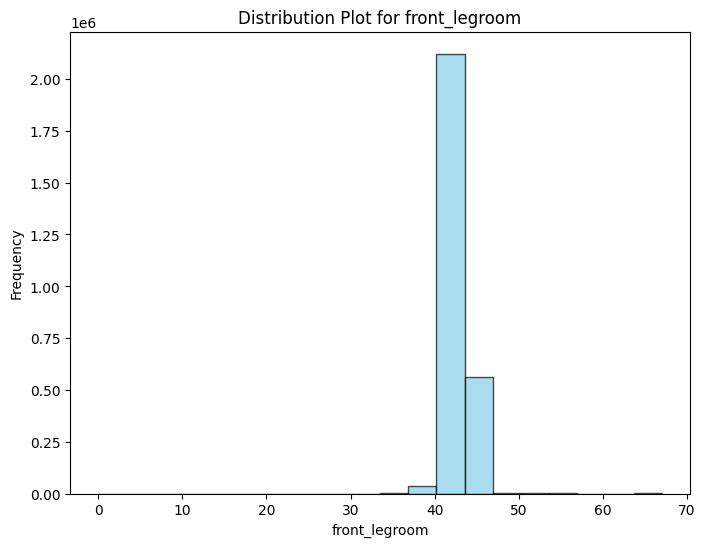

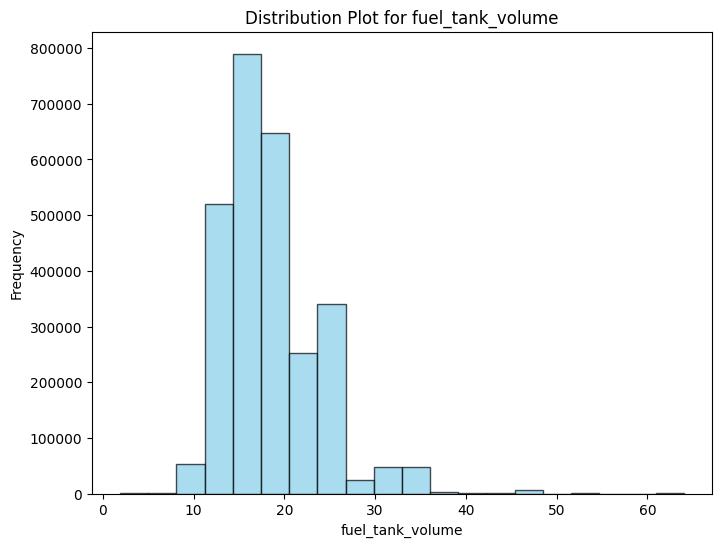

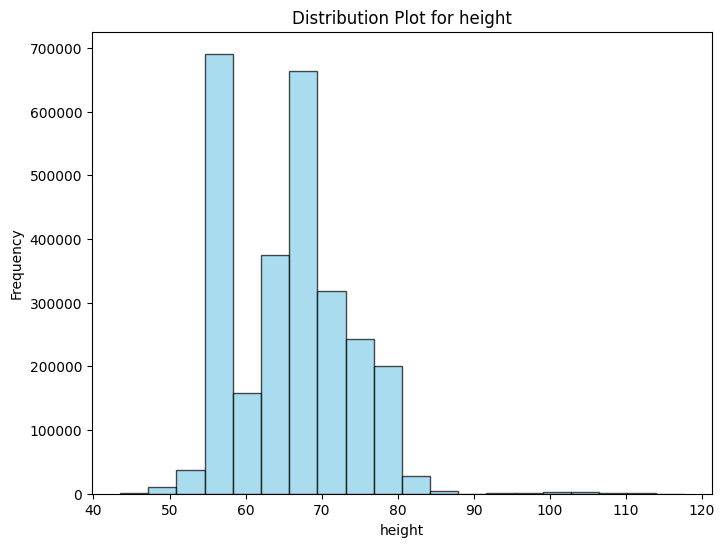

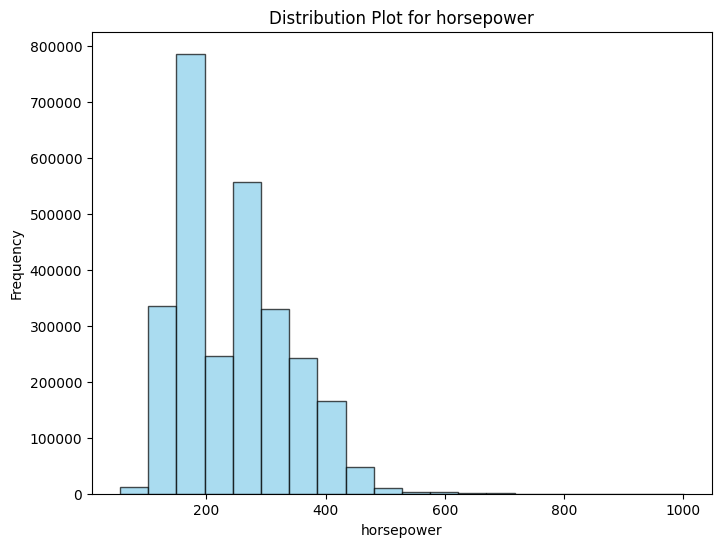

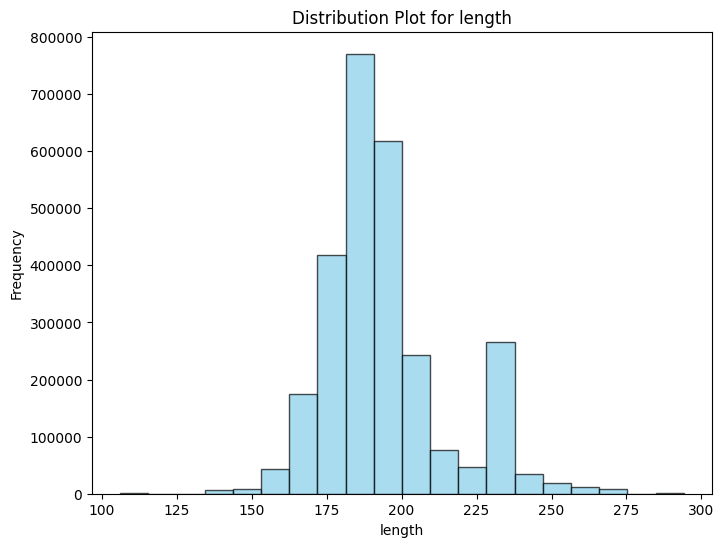

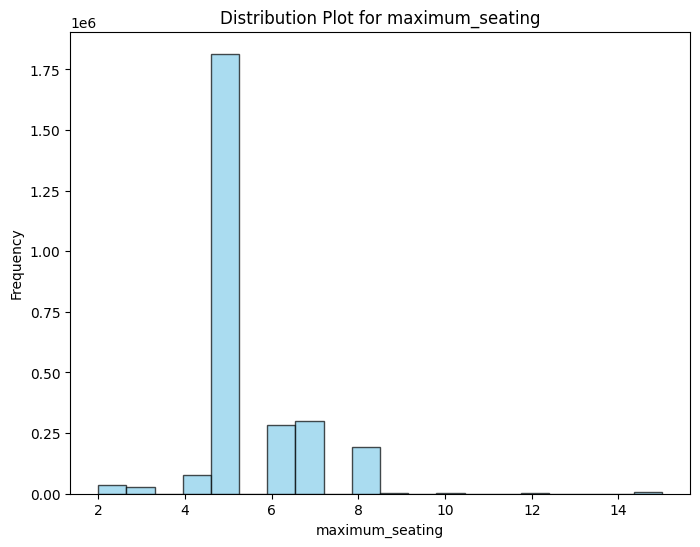

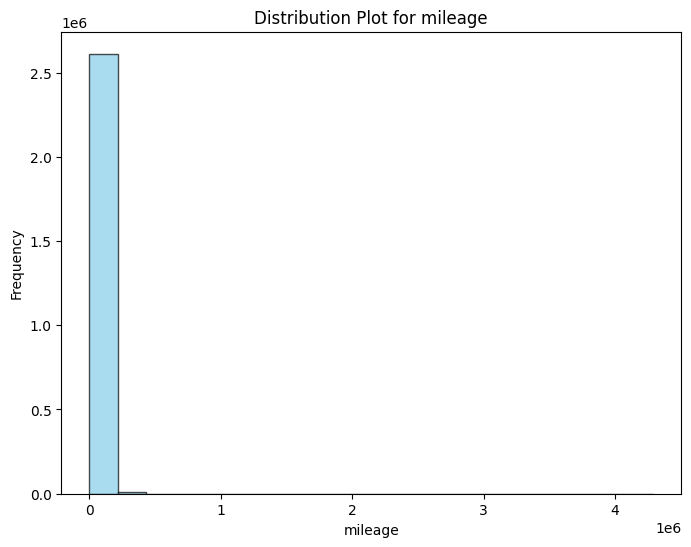

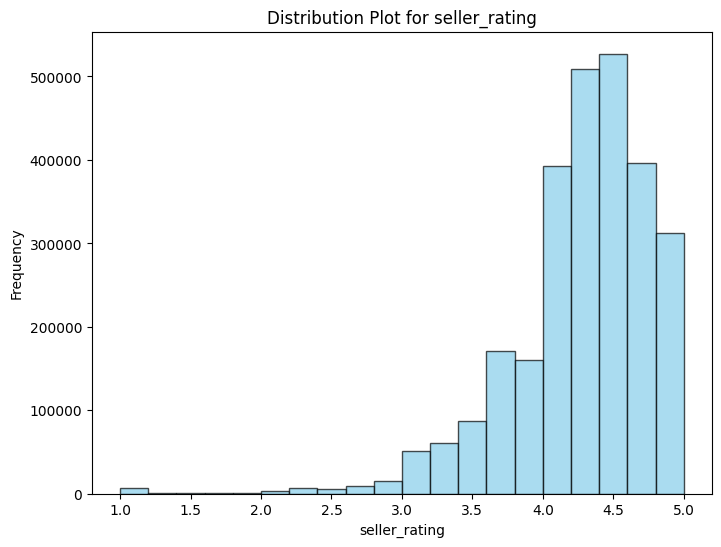

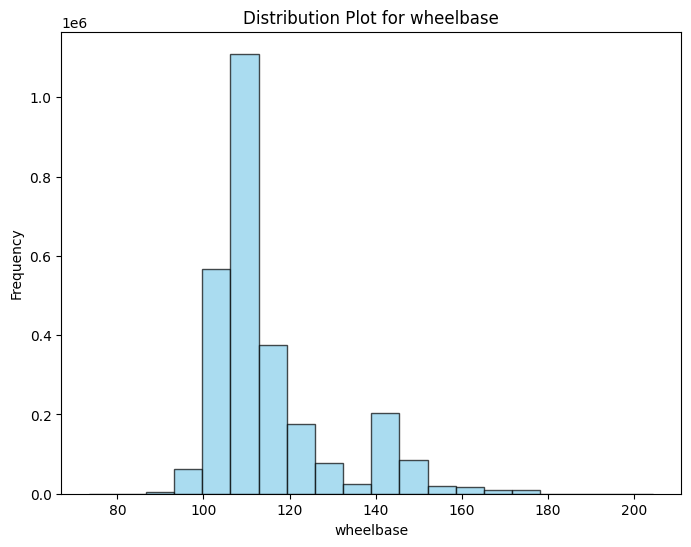

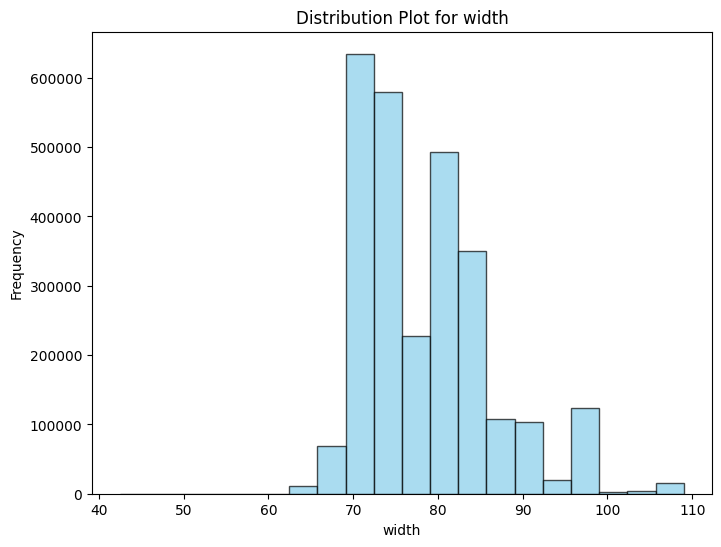

In [26]:
# Get the columns with null values
columns_with_null = df.columns[df.isnull().any()]
distribution_plot(columns_with_null)

Impute median:
1. seller_rating
2. mileage
3. horsepower

In [27]:
impute_median_columns = ["seller_rating", "mileage", "horsepower"]
impute_mean_columns = np.setdiff1d(columns_with_null, np.union1d(required_encoding_columns, impute_median_columns))

In [28]:
for column in impute_median_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True, axis=ROW)

In [29]:
for column in impute_mean_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True, axis=ROW)

In [30]:
max(get_percentage_null(df))

0.0

### Encoding

In [31]:
def one_hot_encoding(df, encoding_column):
    unique_values = df[encoding_column].unique()
    for unique_value in unique_values:
        mask = (df[encoding_column] == unique_value)

        df[f"is_{encoding_column}_{str(unique_value)}"] = mask.astype(int)

    df = df.drop(encoding_column, axis=1)
    return df

Dummy Encoding

In [32]:
df = one_hot_encoding(df, "body_type")
df = df.drop(["is_body_type_SUV / Crossover"], inplace=False, axis=COLUMN)
assert "body_type" not in df

In [33]:
df = one_hot_encoding(df, "fuel_type")
df = df.drop(["is_fuel_type_Gasoline"], inplace=False, axis=COLUMN)
assert "fuel_type" not in df

In [34]:
df = one_hot_encoding(df, "transmission")
df = df.drop(["is_transmission_A"], inplace=False, axis=COLUMN)
assert "transmission" not in df

In [35]:
df = one_hot_encoding(df, "listing_color")
df = df.drop(["is_listing_color_UNKNOWN"], inplace=False, axis=COLUMN)
assert "listing_color" not in df

In [36]:
df = one_hot_encoding(df, "is_new")
df = df.drop(["is_is_new_True"], inplace=False, axis=COLUMN)
assert "is_new" not in df

In [37]:
df = one_hot_encoding(df, "franchise_dealer")
df = df.drop(["is_franchise_dealer_True"], inplace=False, axis=COLUMN)
assert "franchise_dealer" not in df

In [38]:
df = one_hot_encoding(df, "wheel_system_display")
df = df.drop(["is_wheel_system_display_All-Wheel Drive"], inplace=False, axis=COLUMN)
assert "wheel_system_display" not in df

In [39]:
df = one_hot_encoding(df, "wheel_system")
df = df.drop(["is_wheel_system_AWD"], inplace=False, axis=COLUMN)
assert "wheel_system" not in df

This part deals with a column having so many unique values

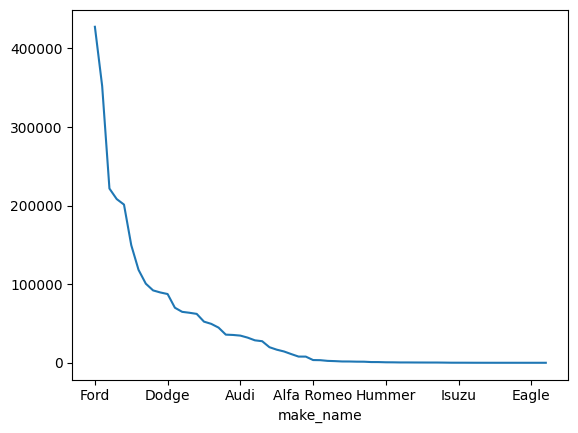

In [40]:
df.make_name.value_counts().plot()

def custom_encoding_makeName(value):
    if value <= 2000: return 1
    elif 2000 < value <= 6000: return 2
    elif 6000 < value <= 10000: return 3
    else: return 4
    
makeName_valCount = dict(df.make_name.value_counts())
df.make_name = df.make_name.apply(lambda x: makeName_valCount[x]).apply(custom_encoding_makeName)

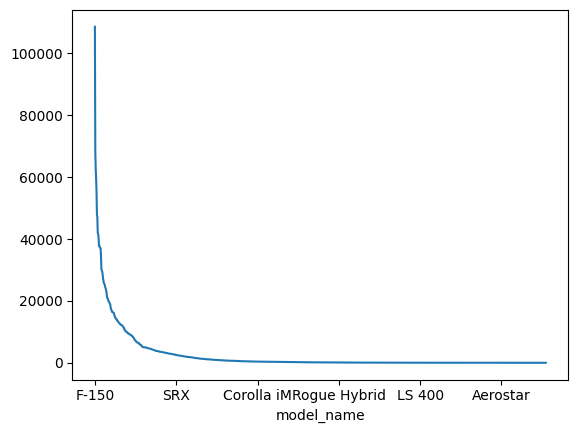

In [41]:
df.model_name.value_counts().plot()

def custom_encoding_modelName(value):
    if value <= 250: return 1
    elif 250 < value <= 1000: return 2
    else: return 3

modelName_valCount = dict(df.model_name.value_counts())
df.model_name = df.model_name.apply(lambda x: modelName_valCount[x]).apply(custom_encoding_modelName)

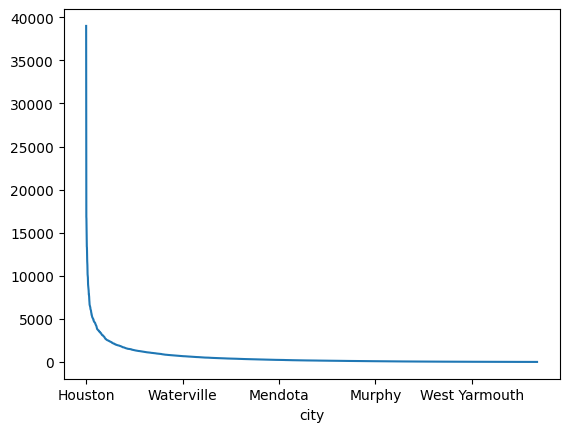

In [42]:
df.city.value_counts().plot()

def custom_encoding_city(value):
    if value <= 250: return 1
    elif 250 < value <= 750: return 2
    elif 750 < value <= 1250: return 3
    else: return 4
    
city_valCount = dict(df.city.value_counts())
df.city = df.city.apply(lambda x: city_valCount[x]).apply(custom_encoding_city)

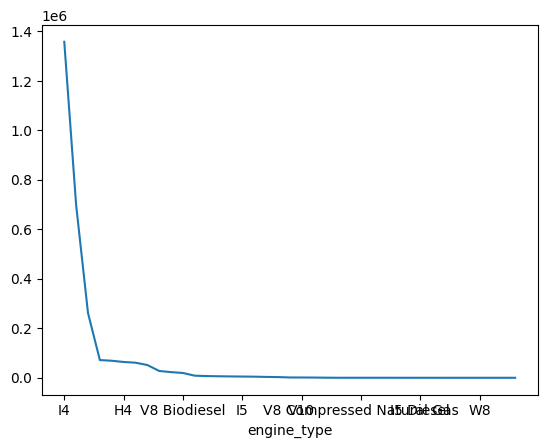

In [43]:
df.engine_type.value_counts().plot()

def custom_encoding_engineType(value):
    if not value: return 0
    elif value <= 10000: return 1
    elif 10000 < value <= 30000: return 2
    else: return 3
    
engineType_valCount = dict(df.engine_type.value_counts())
df.engine_type = df.engine_type.apply(lambda x: engineType_valCount[x]).apply(custom_encoding_engineType)

\This part deals with a column having so many unique values

Encoding DateTime

In [44]:
def get_year_month_day(date_str):
    year, month, day = tuple(date_str.split("-"))
    return (int(month), int(day))

In [45]:
df[['month', 'day']] = df.listed_date.apply(get_year_month_day).apply(pd.Series)
df = df.drop(["listed_date"], inplace=False, axis=COLUMN)

### Check we got a cleaned dataset

In [1]:
df.dtypes.value_counts()

NameError: name 'df' is not defined

In [ ]:
df.isna().sum()

back_legroom           0
city                   0
daysonmarket           0
engine_displacement    0
engine_type            0
                      ..
is_wheel_system_RWD    0
is_wheel_system_4WD    0
is_wheel_system_4X2    0
month                  0
day                    0
Length: 65, dtype: int64

In [ ]:
df.to_csv("./Data/cleaned_data.csv", index=False)